In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\lenovo\Downloads\economic_index.csv") #2 independent(intrest,unemployeement) and 1 dependent feature
df

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256
5,5,2017,7,2.50,5.6,1254
6,6,2017,6,2.50,5.5,1234
7,7,2017,5,2.25,5.5,1195
8,8,2017,4,2.25,5.5,1159
9,9,2017,3,2.25,5.6,1167


In [3]:
#drop unnecessary columns like unnammed,year,month
df.drop(columns=["Unnamed: 0","year","month"],inplace=True) #inplace means you are droping and updating df
df

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256
5,2.50,5.6,1254
6,2.50,5.5,1234
7,2.25,5.5,1195
8,2.25,5.5,1159
9,2.25,5.6,1167


In [4]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [5]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

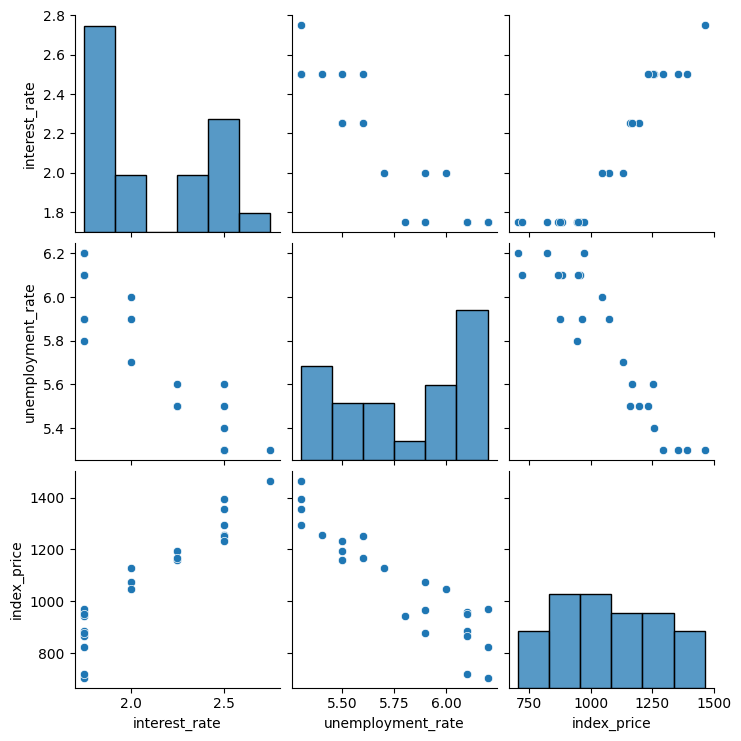

In [6]:
#visualization
sns.pairplot(df)


In [7]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemploment')

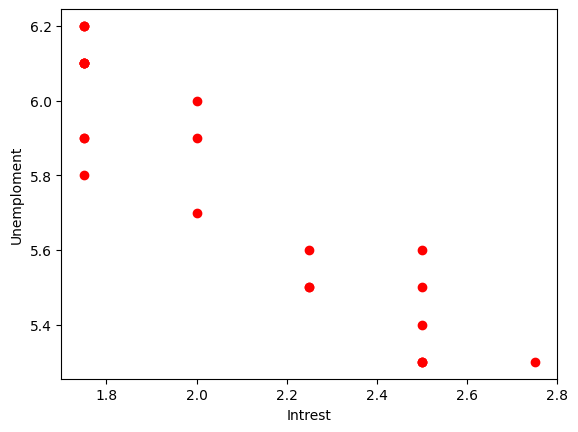

In [8]:
plt.scatter(df['interest_rate'],df['unemployment_rate'],color='r')
plt.xlabel("Intrest")
plt.ylabel("Unemploment")


In [9]:
#independent and dependent feature
X=df[['interest_rate','unemployment_rate']]
y=df['index_price']

In [10]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [11]:
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [12]:
#train and split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [13]:
df.columns

Index(['interest_rate', 'unemployment_rate', 'index_price'], dtype='object')

<Axes: xlabel='interest_rate', ylabel='index_price'>

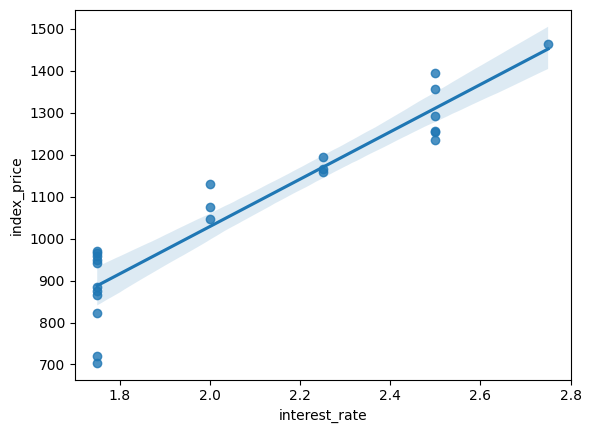

In [14]:
import seaborn as sns
sns.regplot(x='interest_rate', y='index_price', data=df)

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

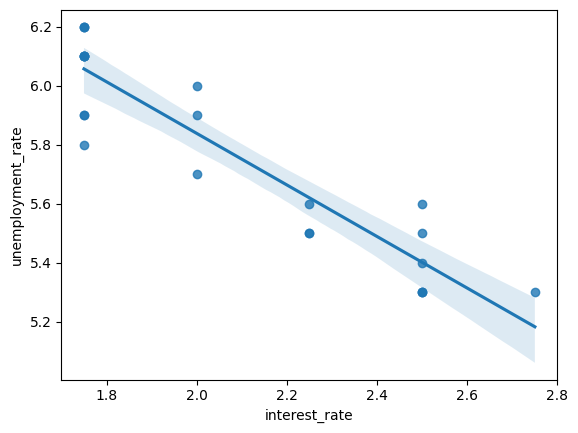

In [15]:
sns.regplot(x='interest_rate', y='unemployment_rate', data=df)

In [16]:
from sklearn.preprocessing import StandardScaler


In [17]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [18]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [19]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()


In [20]:
regression.fit(X_train,y_train)

LinearRegression()

In [27]:
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,X_train,y_train)
validation_score

array([0.96373611, 0.68310264, 0.80679599, 0.79355092, 0.96849166])

In [29]:
#prediction
y_pred=regression.predict(X_test)

In [30]:
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [31]:
##preformance metric 
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

8108.567426306604
73.80444932337097
90.04758423359621


#ASSUMPTIONS


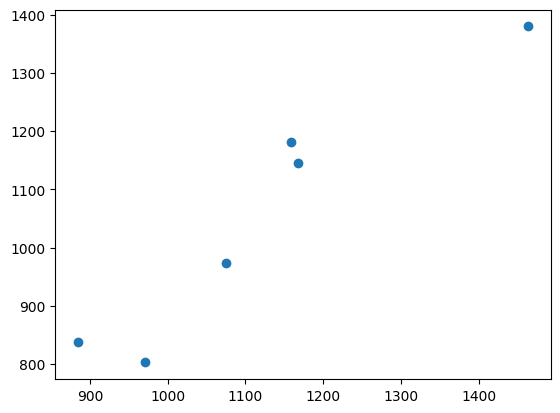

In [34]:
plt.scatter(y_test,y_pred,) #there is a linear relationship so your model performed well

In [38]:
residual=y_test-y_pred
residual

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64

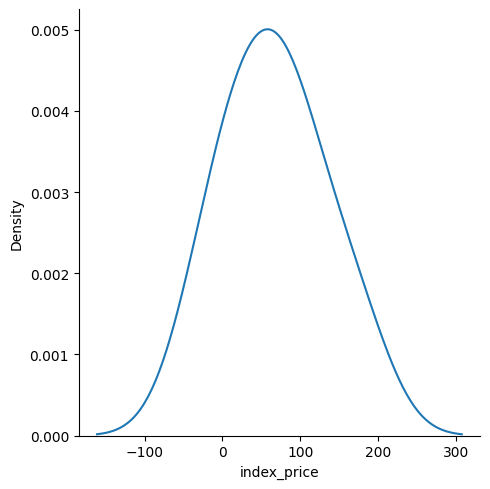

In [44]:
#plot the residual
sns.displot(residual,kind='kde')  #kernel density plot

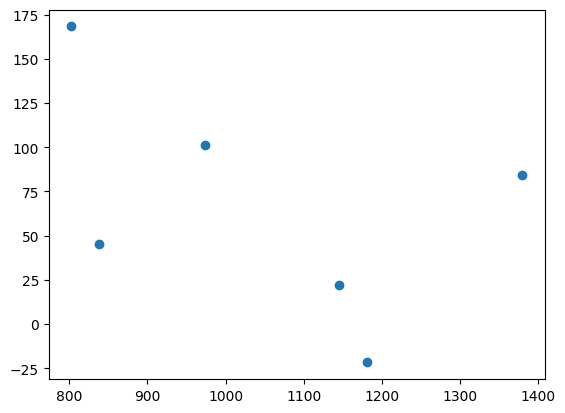

In [46]:
#scatterplot with respect ot preduction and residuals
plt.scatter(y_pred,residual)